# Finding the Best Two Markets to Advertise In

<p style="text-align:center;">
  <img src="e-learning.jpg" width="700" height="100">
  <br>
  Source: <a href="https://unsplash.com/">Unsplash</a>
</p>


## Introduction

This data analysis project aims to determine the optimal advertising strategy for an e-learning company specializing in programming courses. The company's course offerings span various domains, including web and mobile development, data science, game development, and more. In this project, we aim to identify the two most promising markets to invest advertising funds in, with the ultimate goal of promoting the company's products effectively. By leveraging relevant data sources and analytical tools, we aim to provide actionable insights to inform the company's advertising decision-making process.

## Understanding the Data

In order to determine the most effective markets for advertising our programming courses, conducting surveys in different markets is one option. However, this approach can be expensive, so we should explore more economical options first.

One alternative is to search for relevant data that already exists. One promising source is [the 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). conducted by [freeCodeCamp](https://www.freecodecamp.org/), a free e-learning platform specializing in web development courses. This survey, which received responses from more than 20,000 people, was published on the popular [Medium publication of freeCodeCamp](https://medium.freecodecamp.org/), which has over 400,000 followers. The survey attracted not only those interested in web development, but also new coders with diverse interests, making it a valuable resource for our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

To ensure that we are equipped with the necessary tools to analyze the data, we will begin by importing the required libraries.

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

# Define a colormap
cmap = plt.get_cmap('viridis')

# To avoid display of truncated columns
pd.options.display.max_columns=150

We will now quickly explore the `2017-fCC-New-Coders-Survey-Data.csv` file, which is stored in the `clean-data` folder of the repository mentioned earlier. Alternatively, we can use the direct link provided [here](https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv) to read in the file.

In [2]:
# Read the survey data into dataframe and view first five rows
fcc_survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

# Display number of rows and columns in dataset
print(f'Total Rows in survey data: {fcc_survey.shape[0]}')
print(f'Total Columns in survey data: {fcc_survey.shape[1]}')

Total Rows in survey data: 18175
Total Columns in survey data: 136


In [3]:
# Find the percentage of null values in each column
round(fcc_survey.isnull().sum()*100 / len(fcc_survey), 0)

Age                    15.0
AttendedBootcamp        3.0
BootcampFinish         94.0
BootcampLoanYesNo      94.0
BootcampName           95.0
                       ... 
YouTubeMIT             82.0
YouTubeMozillaHacks    97.0
YouTubeOther           93.0
YouTubeSimplilearn     99.0
YouTubeTheNewBoston    84.0
Length: 136, dtype: float64

There appear to be numerous columns with a significant proportion of null values. The plot below provides a summary of the number of non-null values present in each column of the dataset.

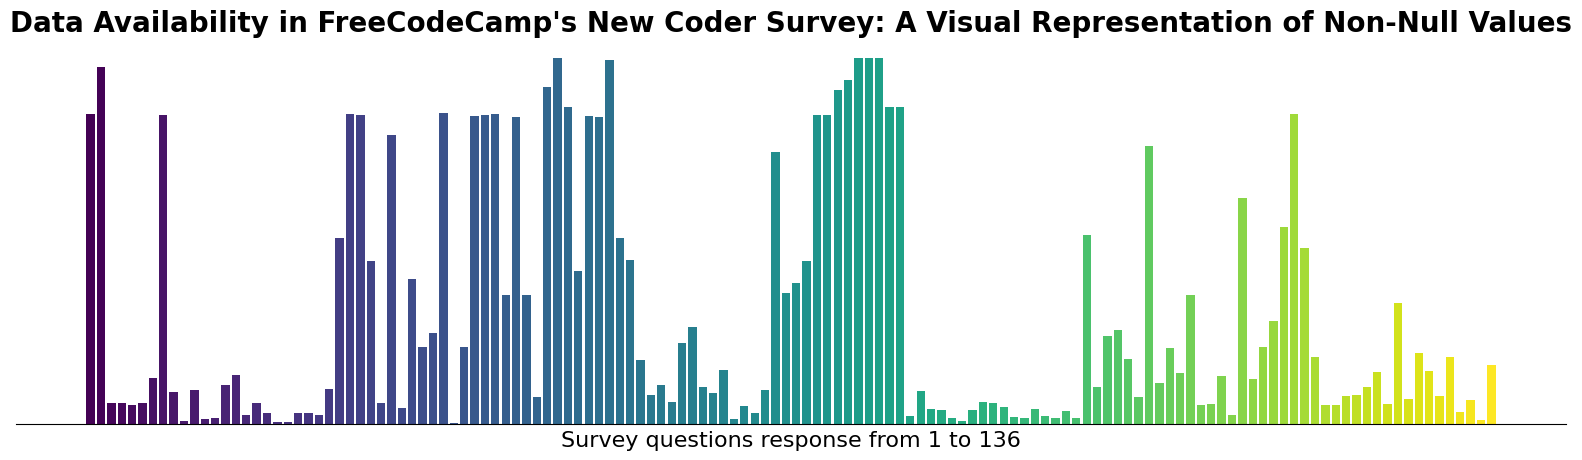

In [4]:
# Calculate non-null values of each column
cols_notnull_vals = fcc_survey.notnull().sum()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 5))

# Get the number of bars to plot
num_bars = len(cols_notnull_vals)

# Plot the non-null proportion of each column
bars = ax.bar(x=fcc_survey.columns, height=cols_notnull_vals,
              color=cmap(np.linspace(0, 1, num_bars)))

# Set title and axis labels
ax.set_title("Data Availability in FreeCodeCamp's New Coder Survey: A Visual Representation of Non-Null Values",
             weight='bold', size=20)
ax.set_xlabel('Survey questions response from 1 to 136', size=16)

# Remove spines
for side in ['top', 'right', 'left']:
    ax.spines[side].set_visible(False)

# Remove ticks and tick labels
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

plt.show()

The dataset we are working with has a large number of empty or null values. To identify which fields are relevant for analysis and which can be disregarded, it's important to have additional knowledge about the contents of each column. While most column names are self-explanatory, there isn't a clear documentation available that explains the meaning of each column name.

In [5]:
# Display the first five rows of the dataset
fcc_survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

To gain a better understanding of each column, we can consult the [datapackage.json](https://github.com/freeCodeCamp/2017-new-coder-survey/blob/master/clean-data/datapackage.json) file in the `clean-data` folder of the [repository](https://github.com/freeCodeCamp/2017-new-coder-survey) mentioned earlier. The initial survey questions are available there, which can provide insight into the description of each column. With this information, we can determine which fields are relevant for our analysis and disregard those that are not.

In [6]:
# Display the names of all columns present in the dataset
print(fcc_survey.columns.tolist())

['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo', 'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation', 'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC', 'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode', 'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen', 'CountryLive', 'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting', 'FirstDevJob', 'Gender', 'GenderOther', 'HasChildren', 'HasDebt', 'HasFinancialDependents', 'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y', 'Income', 'IsEthnicMinority', 'IsReceiveDisabilitiesBenefits', 'IsSoftwareDev', 'IsUnderEmployed', 'JobApplyWh

Out of the 136 columns present in the dataset, the relevant ones for our analysis are those that can provide information about the coder's subject interests, willingness to invest in education and the extent of budget, current geographic location, and preferred language for communication and/or related information. Although some fields may not be required for the project's objective at this point, they might be useful for additional data analysis and are thus included.

Here are some of the relevant columns with their respective actual field names being less formatted:

- Age
- Country of Citizenship
- Country of Residence
- Field of Employment
- Employment Status
- Hours of Learning
- Job Role Interest
- Language Spoken at Home
- Budget for Learning
- Months of Programming Experience

Considering these relevant columns and their potential future use, we will keep only those that are necessary for our analysis and discard the rest:

In [7]:
# Filter dataset with relevant columns
rel_fcc_survey = fcc_survey[['Age', 'AttendedBootcamp', 'BootcampLoanYesNo', 'CountryCitizen', 'CountryLive', 
                             'EmploymentField', 'EmploymentStatus', 'Gender', 'HasChildren', 
                             'HasDebt', 'HasFinancialDependents', 'HasHomeMortgage', 'HomeMortgageOwe', 
                             'HasStudentDebt', 'StudentDebtOwe', 'HoursLearning', 'Income', 'JobRoleInterest',
                             'MaritalStatus', 'MoneyForLearning', 'MonthsProgramming', 
                             'SchoolDegree', 'SchoolMajor']].copy()

Next, we will examine whether the remaining columns still have a significant number of missing values:

In [8]:
round(rel_fcc_survey.isnull().sum()*100 / len(rel_fcc_survey), 0)

Age                       15.0
AttendedBootcamp           3.0
BootcampLoanYesNo         94.0
CountryCitizen            15.0
CountryLive               16.0
EmploymentField           55.0
EmploymentStatus          21.0
Gender                    15.0
HasChildren               79.0
HasDebt                   16.0
HasFinancialDependents    16.0
HasHomeMortgage           65.0
HomeMortgageOwe           92.0
HasStudentDebt            65.0
StudentDebtOwe            82.0
HoursLearning              8.0
Income                    58.0
JobRoleInterest           62.0
MaritalStatus             16.0
MoneyForLearning           9.0
MonthsProgramming          6.0
SchoolDegree              15.0
SchoolMajor               52.0
dtype: float64

Several columns including `EmploymentField`, `HasChildren`, `HasHomeMortgage`, `HasStudentDebt`, `Income`, and `JobRoleInterest`, have a high percentage of missing values, up to 79%. It's possible that many respondents considered these questions irrelevant, or in the case of `JobRoleInterest`, they may not have any specific plans for their future job role yet. On the other hand, the `MoneyForLearning` column has a relatively small number of missing values, and therefore we will use it as the primary column for financial information instead of `Income`.

## Checking for Sample Representativity

As we mentioned earlier, the courses we offer cover a range of domains, including web and mobile development, data science, and game development. However, for the purpose of our analysis, we are interested in a specific population: new coders who are interested in the subjects we teach. We want to answer questions about this population, such as their location and their willingness to invest in learning. Specifically, we would like to know:

- The geographic distribution of new coders interested in our courses.
- The locations with the highest concentration of new coders interested in our courses.
- The amount of money new coders are willing to spend on learning.

Before we can begin analyzing our sample data, we must first determine whether it is representative of our population of interest and includes the appropriate categories of people for our purposes.

In order to determine if our sample data is representative of our population of interest, we will examine the `JobRoleInterest` column. This column lists the job roles that each participant is interested in pursuing. By examining the values in this column, we can gain a better understanding of the interests of our population.

In [9]:
# Display the job roles of 50 participants who responded
for i in range(50):
    if pd.notnull(rel_fcc_survey.loc[i, 'JobRoleInterest']):
        print(rel_fcc_survey.loc[i, 'JobRoleInterest'])

Full-Stack Web Developer
  Front-End Web Developer, Back-End Web Developer,   DevOps / SysAdmin,   Mobile Developer, Full-Stack Web Developer
  Front-End Web Developer, Full-Stack Web Developer, Back-End Web Developer
Full-Stack Web Developer, Information Security,   Mobile Developer,   Front-End Web Developer, Back-End Web Developer
Full-Stack Web Developer
Full-Stack Web Developer,   Quality Assurance Engineer, Game Developer, Back-End Web Developer,   User Experience Designer,   Front-End Web Developer
  DevOps / SysAdmin,   Data Scientist, Information Security, Data Engineer
Back-End Web Developer, Full-Stack Web Developer,   Front-End Web Developer
Full-Stack Web Developer
Full-Stack Web Developer
Full-Stack Web Developer
Full-Stack Web Developer,   Front-End Web Developer,   User Experience Designer, Back-End Web Developer
  Front-End Web Developer,   Mobile Developer, Game Developer, Full-Stack Web Developer
Information Security
Full-Stack Web Developer
Back-End Web Developer
Fu

### Improve readability of the `JobRoleInterest` column

The transformation for role values is necessary to avoid marking the same subjects as different. For instance, "Full-Stack Developer" and "Full stack developer" will be updated to "full stack developer." This transformation is conditional and straightforward. However, there are certain scenarios where thorough data clean-up is required, but due to the lack of data for this column, these scenarios have not been considered for transformation. For example, there may be answers such as:

- "All whatever is required to develop tools to revolutionize the mechanical engineering process"
- "I don't know what the difference is between most of these soz lol"
- "I'm just learning code to increase my skill set. I see it as a literacy issue."

In addition to these scenarios, there may be cases where certain job roles are represented differently, such as "system engineer" and "systems engineer," or "front-end web developer" and "front end web developer." However, for the purposes of this analysis, only the basic and conditional transformation has been applied to ensure consistency in the job role values.

In [10]:
print(f'Total number of coders who responded for their job role interests: {rel_fcc_survey.JobRoleInterest.notnull().sum()}')
print(f'Total number of coders who responded for their job role interests (%): {round(rel_fcc_survey.JobRoleInterest.notnull().sum()/len(rel_fcc_survey)*100)}')

Total number of coders who responded for their job role interests: 6992
Total number of coders who responded for their job role interests (%): 38


The `JobRoleInterest` column in the `rel_fcc_survey` dataframe has a total of `6992` responses, but the data is inconsistent and messy. Each row can have multiple job role interests separated by commas, and some values may have additional characters or capitalization that differentiate the same subject. To clean up this column and make the data more consistent, we will use the Pandas string accessor to convert all values to lowercase and remove any additional characters that differentiate the same subjects. The resulting column will have a list of job role interests for each row, making it easier to analyze and compare the data.

In [11]:
rel_fcc_survey['JobRoleInterest'] = (rel_fcc_survey.JobRoleInterest
                                       .str.replace(r'  |-', ' ', regex=True) # replace double whitespaces and hypens with single whitespace
                                       .str.replace(r',\s+', ',', regex=True) # replace double whitespaces after ',' with single whitespace
                                       .str.strip()
                                       .str.lower()
                                       .str.split(','))

In [12]:
# Display the job roles after the transformation (only non-null rows)
for i in range(50):
    if isinstance(rel_fcc_survey.loc[i, 'JobRoleInterest'], list) and len(rel_fcc_survey.loc[i, 'JobRoleInterest']) > 0:
        print(rel_fcc_survey.loc[i, 'JobRoleInterest'])

['full stack web developer']
['front end web developer', 'back end web developer', 'devops / sysadmin', 'mobile developer', 'full stack web developer']
['front end web developer', 'full stack web developer', 'back end web developer']
['full stack web developer', 'information security', 'mobile developer', 'front end web developer', 'back end web developer']
['full stack web developer']
['full stack web developer', 'quality assurance engineer', 'game developer', 'back end web developer', 'user experience designer', 'front end web developer']
['devops / sysadmin', 'data scientist', 'information security', 'data engineer']
['back end web developer', 'full stack web developer', 'front end web developer']
['full stack web developer']
['full stack web developer']
['full stack web developer']
['full stack web developer', 'front end web developer', 'user experience designer', 'back end web developer']
['front end web developer', 'mobile developer', 'game developer', 'full stack web developer']

The following code prepares plots to visualize the number of courses coders have shown interests in and provides a general idea of the most preferred roles.

In [13]:
# Count number of subjects/roles the coders has showns interest
roles_count = (
    rel_fcc_survey.JobRoleInterest.apply(lambda x: len(x)
                                         if x is not np.nan else np.nan).value_counts(normalize=True).mul(100).round(2)
)

roles_count

1.0     31.65
3.0     15.89
4.0     15.22
5.0     12.04
2.0     10.88
6.0      6.72
7.0      3.86
8.0      1.76
9.0      0.99
10.0     0.47
12.0     0.30
11.0     0.19
13.0     0.03
Name: JobRoleInterest, dtype: float64

The output shows the distribution of the number of job roles that coders are interested in. The majority of coders (31.65%) are interested in only one job role, while around 15-16% are interested in 3 or 4 job roles. Around 12% of coders are interested in 5 job roles, and 10.88% are interested in 2 job roles. The percentage of coders interested in 6, 7, 8, 9, 10, 11, or 12 job roles gradually decreases from 6.72% to 0.30%. Only a very small percentage of coders (0.03%) are interested in 13 job roles.

We will now identify the most popular courses among the coders and save the results into a dataframe.

In [14]:
roles_dict = {}
for roles in rel_fcc_survey.JobRoleInterest:
    if roles is not np.nan:
        for role in roles:
            if role in roles_dict:
                roles_dict[role] += 1
            else:
                roles_dict[role] = 1

top_roles = pd.DataFrame(roles_dict.items(), columns=['RoleName', 'Count'])

# Compute Contribution of each subject percentage wise
top_roles['Count%'] = ((top_roles.Count/len(top_roles.Count)).mul(100).round(2))

# Select only top 10 most sought out courses
top_roles = top_roles.sort_values(by='Count%', ascending=False).head(10).reset_index(drop=True)
top_roles

,RoleName,Count,Count%
0,full stack web developer,4198,2209.47
1,front end web developer,3533,1859.47
2,back end web developer,2772,1458.95
3,mobile developer,2305,1213.16
4,data scientist,1643,864.74
5,game developer,1628,856.84
6,user experience designer,1469,773.16
7,information security,1326,697.89
8,data engineer,1248,656.84
9,devops / sysadmin,927,487.89


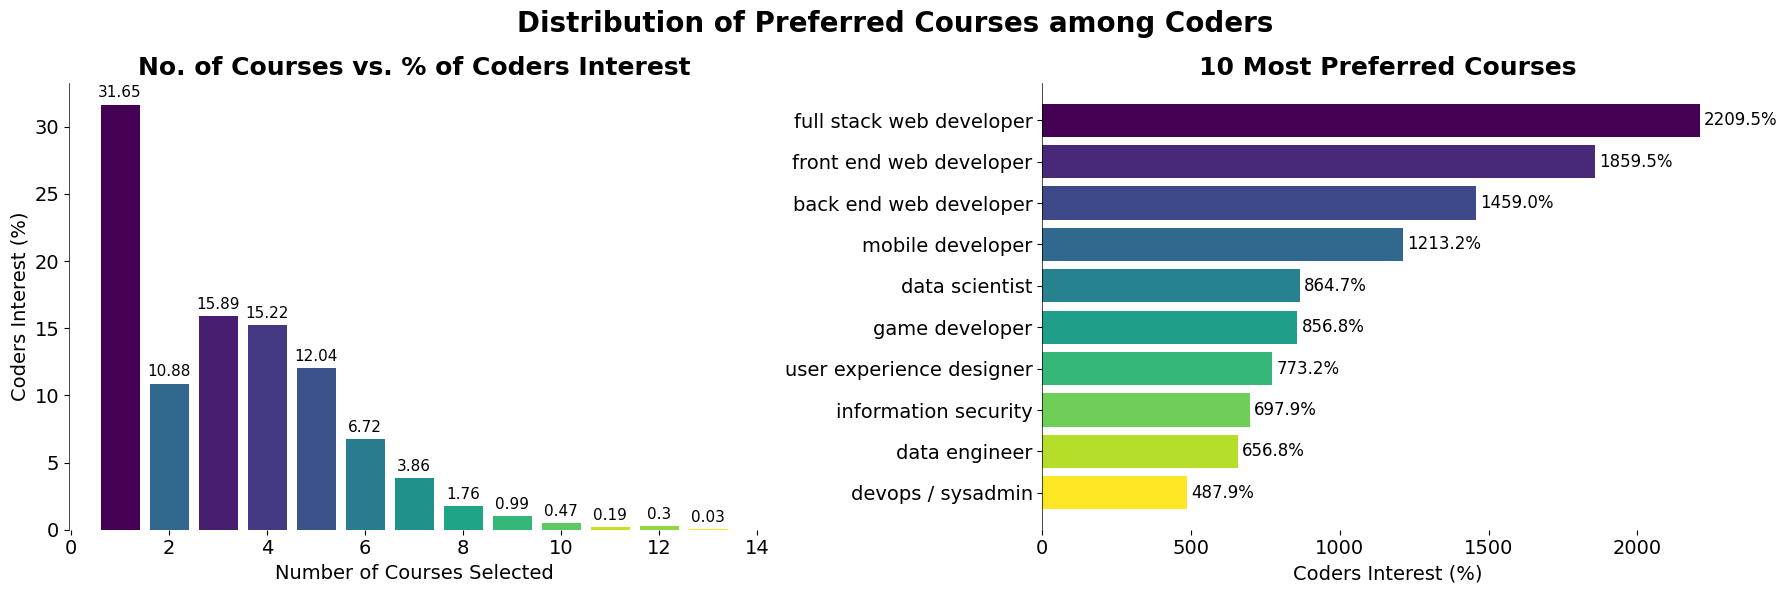

In [15]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Get the number of bars to plots
num_bars1 = len(roles_count)
num_bars2 = len(top_roles)

# Plot number of courses
bars1 = ax1.bar(x=roles_count.index.astype(int), height=roles_count, color=cmap(np.linspace(0, 1, num_bars1)))

# Plot most preferred courses
bars2 = ax2.barh(y=top_roles['RoleName'], width=top_roles['Count%'], color=cmap(np.linspace(0, 1, num_bars2)))

# Invert the y-axis for the second plot
ax2.invert_yaxis()

# Set titles and axis labels for both plots
ax1.set_title('No. of Courses vs. % of Coders Interest', weight='bold', size=18)
ax1.set_xlabel('Number of Courses Selected', size=14)
ax1.set_ylabel('Coders Interest (%)', size=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

ax2.set_title('10 Most Preferred Courses', weight='bold', size=18)
ax2.set_xlabel('Coders Interest (%)', size=14)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

# Remove spines from both plots
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)

# Add values to bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', size=11)
    
for bar in bars2:
    width = bar.get_width()
    ax2.annotate(f'{width:.1f}%', xy=(width, bar.get_y() + bar.get_height() / 2),
                 xytext=(3, 0), textcoords="offset points", ha='left', va='center', size=12)
    
# Set common title for both plots
fig.suptitle('Distribution of Preferred Courses among Coders', weight='bold', size=20)

plt.tight_layout()
plt.show()

Based on the above distributions, the following observations can be summarized:

- The top three most sought out courses are full stack web development (22.09%), front end web development (18.59%), and back end web development (14.58%).
- Other popular courses among coders include mobile development (12.13%), data science (8.65%), game development (8.57%), and user experience design (7.73%).
- Information security (6.98%), data engineering (6.57%), and devops/sysadmin (4.88%) are relatively less popular.
- Web development courses are in high demand, which suggests that coders are interested in pursuing careers in web development.
- There is significant interest in fields such as data science, game development, and user experience design, which are important areas of specialization in the tech industry.

### Coders Interested in Web Development or Mobile Development Roles

The distribution of the number of courses taken by coders indicates that they are interested in more than one subject. The top 10 most preferred courses also provide insights into the various courses that coders are interested in.

Moreover, it is evident that front-end web development and full-stack web development can be considered specializations under the broader term "Web Developer". Currently, the data has not undergone a thorough cleaning process, and responses have been categorized into two groups:

- Web or Mobile: coders who have mentioned at least one of the two roles
- Others: coders who have not mentioned either role

To analyze job role data, we will define a function called `search_web_mob` that searches for the terms "web dev" or "mobile dev" in a list of job roles. If either of these terms is found, the function will classify the job as "web or mobile". Otherwise, it will return "others".

After defining the function, we will use it to create a new column called `WebOrMobDev`. This column will indicate whether each respondent expressed interest in web or mobile development.

In [16]:
def search_web_mob(job_list):
    pattern = re.compile(r'web\s?developer|mobile\s?developer')
    if job_list is not np.nan:
        web_mob_list = list(filter(pattern.search, job_list))
        if len(web_mob_list) > 0:
            return 'web or mobile'
        else:
            return 'others'
    
rel_fcc_survey['WebOrMobDev'] = rel_fcc_survey.JobRoleInterest.apply(search_web_mob)

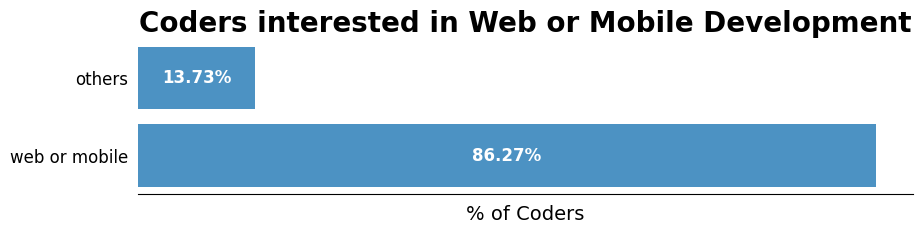

In [17]:
# Calculate the frequency to coders interest in percentage
jobs_percent = rel_fcc_survey.WebOrMobDev.value_counts(normalize=True)
# Extract frequency indexes (['web or mobile', 'others'])
jobs_freq_indexes = rel_fcc_survey.WebOrMobDev.value_counts().index

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 2))
ax.barh(y=jobs_freq_indexes, width=jobs_percent, color='tab:blue', alpha=0.8)

# Set title and axis labels
ax.set_title('Coders interested in Web or Mobile Development', weight='bold', size=20)
ax.set_xlabel('% of Coders', size=14)
ax.set_xticks([])
ax.tick_params(axis='y', labelsize=12, left=False)

# Disable spines
for side in ['top', 'right', 'left']:
    ax.spines[side].set_visible(False)

# Add bar values in the center of each bar in white color
for i, v in enumerate(jobs_percent):
    ax.text(v/2, i, str(round(v*100, 2))+'%', color='white', va='center', ha='center', fontweight='bold', size=12)

plt.show()

Based on the results obtained, it can be observed that the majority of the respondents in the dataset are interested in web and/or mobile development skills. Specifically, 86.27% of the respondents have mentioned at least one of the two roles, while 13.73% have mentioned others.

In terms of the representativeness of the dataset, we can conclude that it is valid for further analysis. The fact that the dataset includes a significant number of respondents interested in web and/or mobile development skills suggests that it is representative of the population of respondents that the we are looking for. This makes the dataset useful for conducting further analysis and drawing meaningful insights.

## New Coders - Locations and Densities

After confirming that the sample is representative of the target population, we can now dive into analyzing it. Our first step is to identify the location and densities of new coders. The dataset provides information about the participants' location at the country level, with `CountryCitizen` indicating the country of origin and `CountryLive` indicating the current country of residence. We will be using the `CountryLive` variable for our analysis since we are interested in the location of the participants at the time of running the ads.

We can view each country as a separate market and aim to identify the two best countries to advertise in. One way to measure a market's potential is to look at the number of potential customers. More potential customers in a market indicate a better market. For example, if we can convince 10% of 5000 potential customers in market A to buy our product, it is better than convincing 100% of 30 potential customers in market B.

To ensure the reliability of our analysis, it is recommended to eliminate rows from the dataset where participants did not provide information on their preferred role. This is because we cannot accurately determine their interests if they did not respond, and it is better to exclude this group of participants from our analysis.

In [18]:
# Drop rows where coders haven't reponded to preferred job role(s)
rel_fcc_survey.dropna(subset=['JobRoleInterest'], inplace=True)

In [19]:
# Keep only not-null values of the `JobRoleInterest` column
good_fcc_survey = rel_fcc_survey[rel_fcc_survey.JobRoleInterest.notnull()].copy()

# Check results (should output 0)
good_fcc_survey.JobRoleInterest.isnull().sum()

0

In the next step, we'll define a function called `create_freq_table` that takes two arguments, `df` and `column`. This function computes the absolute and relative frequencies for the given column in the given dataframe. The function first extracts a list of unique countries from the column, then calculates the absolute and relative frequencies for each country.

After calling the function with the necessary arguments, we retrieve the lists of absolute and relative frequencies and store them in separate variables, `abs_freq` and `rel_freq`. Finally, we create a DataFrame `freq_table` with the two lists of frequencies as columns. This dataframe displays the top countries in the given column and their corresponding absolute and relative frequencies.

In [20]:
def create_freq_table(df, column):
    # Extract countries from frequency table
    countries_list = df[column].value_counts().index.tolist()
    # Calculate abs and rel frequencies
    abs_freq = df[column].value_counts()[countries_list]
    rel_freq = df[column].value_counts(normalize=True).mul(100).round()[countries_list]
    
    return abs_freq, rel_freq

# Call the function to access absolute and relative frequencies
abs_freq, rel_freq = create_freq_table(good_fcc_survey, 'CountryLive')

# Store lists of values in dataframe
freq_table = pd.DataFrame({'Absolute Frequency': abs_freq,
                           'Relative Frequency': rel_freq})

# View top 10 results
freq_table.head(10)

,Absolute Frequency,Relative Frequency
United States of America,3125,46.0
India,528,8.0
United Kingdom,315,5.0
Canada,260,4.0
Poland,131,2.0
Brazil,129,2.0
Germany,125,2.0
Australia,112,2.0
Russia,102,1.0
Ukraine,89,1.0


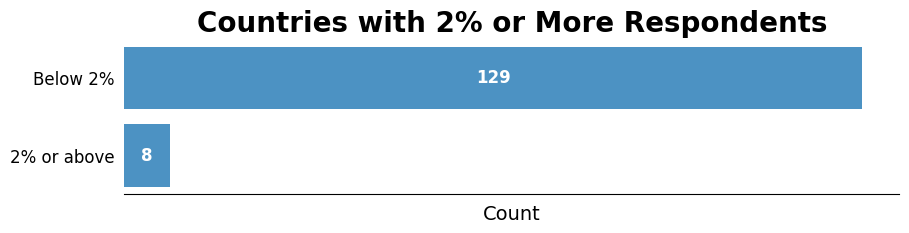

In [21]:
# Calculate counts of countries with relative frequency above or below 2%
above_2_count = (freq_table['Relative Frequency'] >= 2.0).sum()
below_2_count = (freq_table['Relative Frequency'] < 2.0).sum()

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 2))
ax.barh(y=['2% or above', 'Below 2%'],
        width=[above_2_count, below_2_count],
        color='tab:blue', alpha=0.8)

ax.set_title('Countries with 2% or More Respondents', weight='bold', size=20)
ax.tick_params(axis='y', labelsize=12, left=False)
ax.set_xticks([])
ax.set_xlabel('Count', size=14)

# Display bar values
for i, v in enumerate([above_2_count, below_2_count]):
    ax.text(v * 0.5, i, int(v), size='large', color='white', fontweight='bold', ha='center', va='center')

# Disable spines
for side in ['top', 'right', 'left']:
    ax.spines[side].set_visible(False)

plt.show()

Based on a survey of coders from various countries, the following findings are presented after grouping countries together to provide a clearer view of the results:

- Out of all the countries represented in the survey, 8 countries in the survey had 2% or more of the total respondents, which can significantly impact the survey results. Although not explicitly mentioned, these countries can be inferred from the data.
- The remaining 129 countries, each had responses from below 2% of the total coders who attempted the survey. These countries, while still important, are likely to have a smaller impact on the overall survey results.

The plot and data below provide a detailed breakdown of the top 8 countries with the highest percentage contribution of coders in the survey.

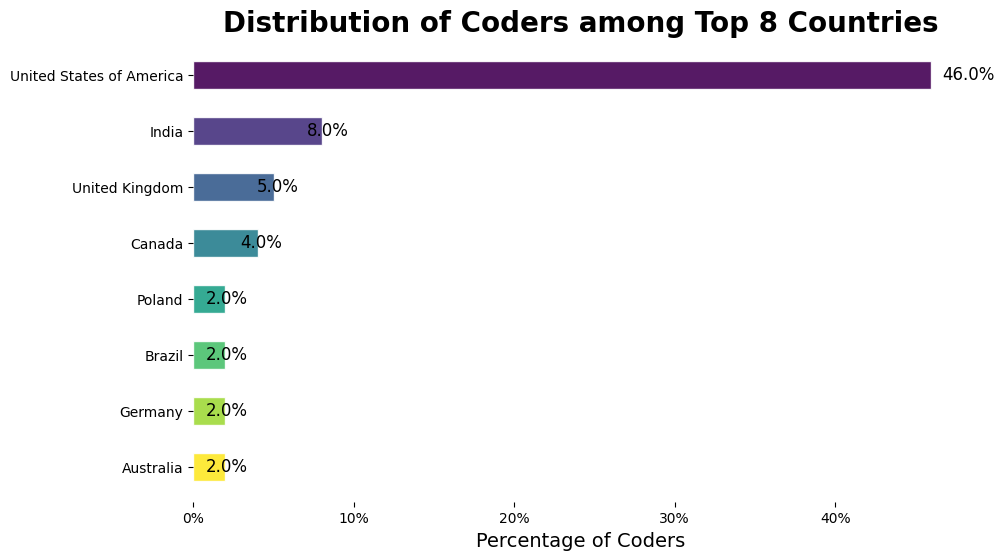

In [22]:
# Filter the data for countries with relative frequency of 2% or above
freq_table_filtered = freq_table[freq_table['Relative Frequency'] >= 2.0]

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Get the number of bars to plot
num_bars = len(freq_table_filtered)

bars = ax.barh(y=freq_table_filtered.index, width=freq_table_filtered['Relative Frequency'],
               color=cmap(np.linspace(0, 1, num_bars)), height=0.5, alpha=0.9, edgecolor='white')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(1.05*width, bar.get_y() + 0.25, f'{width:.1f}%', ha='center', va='center', fontsize=12)

# Add title and axis labels
ax.set_title('Distribution of Coders among Top 8 Countries', weight='bold', size=20)
ax.set_xlabel('Percentage of Coders', size=14)

# Set x-axis tick format to percentage
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# Invert the y-axis to show the bars in descending order
ax.invert_yaxis()

# Remove spines
for side in ['top', 'right', 'bottom', 'left']:
    ax.spines[side].set_visible(False)

plt.show()

According to our findings, the USA is the most promising market for advertisement, as 46% of our potential customers reside there. However, when looking at the table and graph, it's unclear which country should be considered the second-best market. While India ranks second, with 8% of potential customers, the difference between India and the third-ranked UK, with 5% of potential customers, is not significant.

Therefore, although we have gained valuable insights into the location of new coders, we cannot rely on this information alone to make a decision. We need to conduct further analysis to determine the best course of action.

## Spending Money for Learning

We previously found useful information about the location of new coders, including the countries where they live. However, to make an informed decision about where to advertise, we need to dig deeper into our analysis. Specifically, we need to determine how much money new coders are willing to spend on learning, since advertising to markets where most people are only willing to learn for free is unlikely to be profitable for us.

To accomplish this, we can use the `MoneyForLearning` column, which describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Since our company sells subscriptions at a price of $59 per month, we're interested in finding out how much money each student spends per month.

To focus our analysis, we will narrow it down to four countries: the US, India, the United Kingdom, and Canada. We made this decision for two reasons:

- These four countries have the highest absolute frequencies in our sample, meaning we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all four of these countries. The more people that know English, the better our chances of targeting the right people with our ads.

To better understand the spending behavior of new coders, we can create a new column that describes the amount of money a student has spent per month (at the moment they completed the survey). This will help us to estimate how much money a typical new coder might be willing to spend on learning.

To create this new column, we need to divide the `MoneyForLearning` column by the `MonthsProgramming` column. However, some students may have indicated that they have been learning to code for 0 months (perhaps they had just started when they completed the survey). To avoid dividing by 0, we'll replace all the values of 0 with 1 before performing the division.

In [23]:
# Filter 'CountryLive' column for the top 4 countries ('United States of America', 'India', 'United Kingdom', and 'Canada') 
top_4 = ['United States of America', 'India', 'United Kingdom', 'Canada']
target_fcc_survey = good_fcc_survey[good_fcc_survey['CountryLive'].isin(top_4)].copy()

# Replace 0 with 1 in 'MonthsProgramming'
target_fcc_survey['MonthsProgramming'] = target_fcc_survey['MonthsProgramming'].replace(0, 1)

# Divide 'MoneyForLearning' by 'MonthsProgramming' and create new column to store results
target_fcc_survey['SpendingPerMonth'] = target_fcc_survey.MoneyForLearning / target_fcc_survey.MonthsProgramming

# View results
target_fcc_survey[['MoneyForLearning', 'MonthsProgramming', 'SpendingPerMonth']].head()

,MoneyForLearning,MonthsProgramming,SpendingPerMonth
1,80.0,6.0,13.333333
2,1000.0,5.0,200.000000
6,0.0,12.0,0.000000
13,NaN,NaN,NaN
14,NaN,9.0,NaN


Next, We will check for null values in the `SpendingPerMonth` column first and then remove the rows with null values from the dataframe.

In [24]:
col_null_before = target_fcc_survey.SpendingPerMonth.isnull().sum()
print(f'Null values in SpendingPerMonth before dropping rows: {col_null_before}')

# Drop rows where the value is null in 'SpendingPerMonth'
target_fcc_survey = target_fcc_survey.dropna(subset='SpendingPerMonth')

col_null_after = target_fcc_survey.SpendingPerMonth.isnull().sum()
print(f'Null values in SpendingPerMonth after dropping rows: {col_null_after}')

Null values in SpendingPerMonth before dropping rows: 313
Null values in SpendingPerMonth after dropping rows: 0


We'll group the data by the `CountryLive` column and calculate the mean and median of how much money a student spends on average each month in the US, India, the United Kingdom, and Canada. Choosing the mean as the summary metric will consider all values in the distributions, while calculating the median will help us compare with the mean.

In [25]:
# Find 'mean' and 'median' of each country based on student spending
student_spending = target_fcc_survey.groupby('CountryLive')['SpendingPerMonth'].agg(['mean', 'median']).round()

# Sort values by 'mean' in descending order
student_spending = student_spending.sort_values('mean', ascending=False)
student_spending

,mean,median
CountryLive,,
United States of America,228.0,3.0
India,135.0,0.0
Canada,114.0,0.0
United Kingdom,46.0,0.0


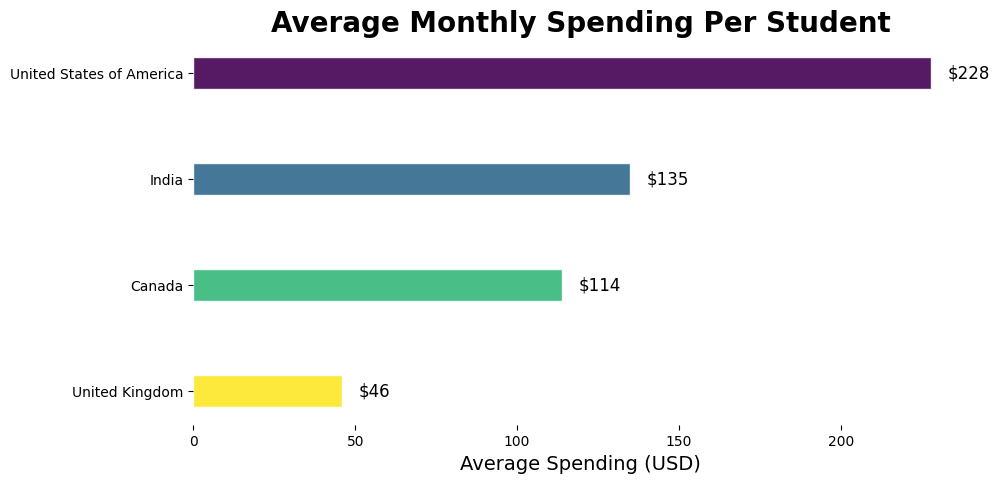

In [26]:
# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 5))

# Get the number of bars to plot
num_bars = len(student_spending)

bars = ax.barh(y=student_spending.index, width=student_spending['mean'],
               color=cmap(np.linspace(0, 1, num_bars)), height=0.3, alpha=0.9, edgecolor='white')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + 0.15, f'${width:.0f}', ha='left', va='center', fontsize=12)

# Add title and axis labels
ax.set_title('Average Monthly Spending Per Student', weight='bold', size=20)
ax.set_xlabel('Average Spending (USD)', size=14)

# Invert the y-axis to show the bars in descending order
ax.invert_yaxis()

# Remove spines
for side in ['top', 'right', 'bottom', 'left']:
    ax.spines[side].set_visible(False)

plt.show()

Based on our findings, we can see that the United States has the highest mean spending per month on learning programming among the four countries surveyed, with a value of \\$228. However, the median spending of the United States is only \\$3, indicating that a significant portion of the respondents spend little to nothing on learning programming. India and Canada also have relatively high mean spending per month, with values of \\$135 and \\$114 respectively, but similarly low median spending of \\$0. The United Kingdom has the lowest mean and median spending per month, with values of \\$46 and \\$0 respectively. These results suggest that while there are some individuals who spend a significant amount on learning programming, a large portion of respondents spend little to nothing, indicating a potential market for affordable programming courses.

## Dealing with Extreme Outliers

### Mean

Following are the mean values we obtained in our previous findings:

| CountryLive              | mean  | median |
|--------------------------|-------|--------|
| United States of America | 228.0 | 3.0    |
| India                    | 135.0 | 0.0    |
| Canada                   | 114.0 | 0.0    |
| United Kingdom           | 46.0  | 0.0    |


Interestingly, the mean values for Canada and the United Kingdom are surprisingly low compared to those for India. Given certain socio-economic indicators, such as the [GDP per capita world map](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies), we might expect people in Canada and the UK to spend more on learning than those in India.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Map_of_countries_by_GDP_%28PPP%29_per_capita_in_2022.svg/420px-Map_of_countries_by_GDP_%28PPP%29_per_capita_in_2022.svg.png" width="400" height="100">

This discrepancy could be due to a lack of representative data for Canada, the UK, and India, or due to outliers (such as incorrect survey responses) that have inflated the mean for India or deflated it for Canada and the UK. Alternatively, the results may be accurate.

### Median

Also, the table above shows the median values for the amount of money spent by survey respondents from different countries on learning to code. The median value represents the middle point of the distribution of values, which is less sensitive to outliers than the mean value. In this case, the median values for all countries are 0.0, except for the United States of America where it is 3.0. This indicates that most respondents from these countries did not spend any money on learning to code, except for those in the United States who spent at least 3 dollars. However, it is important to note that the median value alone does not provide a complete picture of the data distribution and should be considered along with other measures such as the mean, standard deviation, and quartiles.

With that objective in mind, we will generate four box plots to analyze the spread of the variable denoting the monthly expenditure of respondents in each country - the United States, India, Canada, and the United Kingdom - to identify any potential outliers.

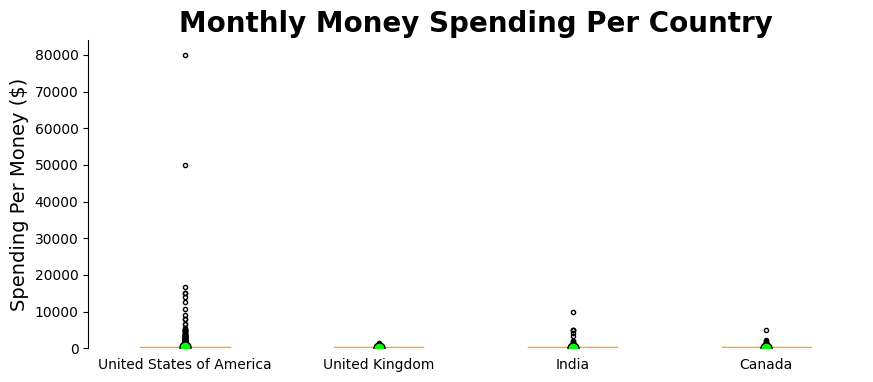

In [27]:
def create_box_plot(df=target_fcc_survey,
                    column='CountryLive',
                    title='Monthly Money Spending Per Country',
                    xlabel=''):
    '''
    Creating box plots to visualize the distribution of the 'SpendingPerMonth' column by countries
    '''
    # Define figure and axis
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Define custom properties for the boxplot
    boxprops = dict(linewidth=2)
    whiskerprops = dict(linewidth=2)
    capprops = dict(linewidth=2)
    medianprops = dict(linestyle='-', linewidth=2.5, color='orange')
    meanpointprops = dict(marker='o', markersize=8, markerfacecolor='lime', markeredgecolor='black')
    
    # Create boxplot
    ax.boxplot([df.loc[df[column] == value, 'SpendingPerMonth'] for value in df[column].unique()],
               labels=df[column].unique(),
               showmeans=True,
               meanprops=meanpointprops,
               boxprops=boxprops,
               whiskerprops=whiskerprops,
               capprops=capprops,
               medianprops=medianprops,
               flierprops=dict(marker='o', markersize=3))
    
    # Add title and labels
    ax.set_title(title, weight='bold', size=20)
    ax.tick_params(axis='both', labelsize=10, bottom=False)
    ax.set_xlabel(xlabel, size=14)
    ax.set_ylabel('Spending Per Money ($)', size=14)
    ax.set_ylim(0, None)
    
    # Remove spines
    for side in ['top', 'right', 'bottom']:
        ax.spines[side].set_visible(False)
    
    plt.show()

# Create box plots for the 'SpendingPerMonth' column by countries
create_box_plot()

We can observe that the severely right-skewed distributions make our box plots appear squeezed and display numerous outliers for each country. Nonetheless, the primary concern is the presence of two extreme outliers for the United States. Although these outliers may represent accurate values (such as advance payments for expensive courses), they distort the overall picture significantly. As a result, we cannot draw meaningful conclusions regarding India, the United Kingdom, and Canada, nor can we accurately locate the mean values (represented by light-green circles) on the distributions. To address this, we will eliminate the outliers and recalculate the mean values for monthly money spending by country, as we did in the previously.

In [28]:
# Filter the values of the 'SpendingPerMonth' column smaller than $20,000
filter_fcc = target_fcc_survey[target_fcc_survey['SpendingPerMonth'] < 20000]

# Recalculate the 'mean' of each country based on student spending per month
recal_student_spending = filter_fcc.groupby('CountryLive')['SpendingPerMonth'].agg(['mean']).round()
recal_student_spending = recal_student_spending.sort_values('mean', ascending=False)
recal_student_spending

,mean
CountryLive,
United States of America,184.0
India,135.0
Canada,114.0
United Kingdom,46.0


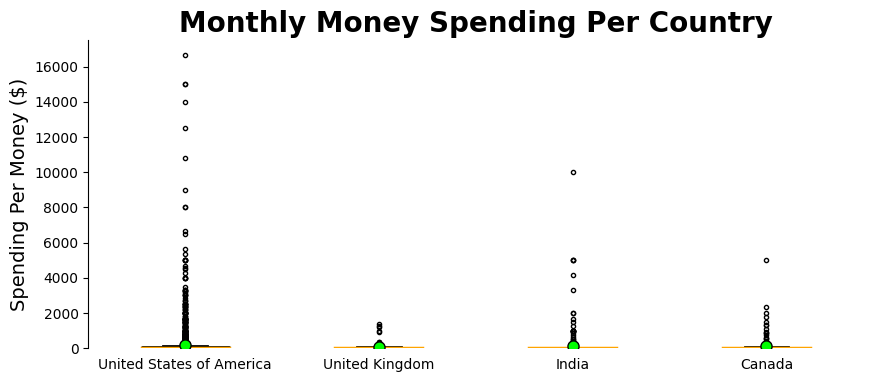

In [29]:
# Create new box plots to visualize the updated distribution (filter_fcc)
create_box_plot(df=filter_fcc)

The calculated mean values are still unusual, and the box plots remain compressed with numerous outliers, particularly for the United States but also for the other three countries.

### Examine outliers for India

We need to examine the outliers for India. Some individuals paid more than $2,500 per month, and we should focus on them and investigate their responses to other survey questions. It's possible that these respondents participated in some high-cost bootcamps or educational programs, which would explain their high learning expenses.

In [30]:
# Function to return dataframe containing the outliers
def find_outliers(country: str, spending: int):
    return filter_fcc[(filter_fcc['CountryLive'] == country) & (filter_fcc['SpendingPerMonth'] >= spending)]

# Find outliers for India
india_outliers = find_outliers('India', 2500)
india_outliers

,Age,AttendedBootcamp,BootcampLoanYesNo,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHomeMortgage,HomeMortgageOwe,HasStudentDebt,StudentDebtOwe,HoursLearning,Income,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,WebOrMobDev,SpendingPerMonth
1728,24.0,0.0,NaN,India,India,NaN,A stay-at-home parent or homemaker,male,NaN,0.0,0.0,NaN,NaN,NaN,NaN,30.0,NaN,"[user experience designer, mobile developer, p...","single, never married",20000.0,4.0,bachelor's degree,Computer Programming,web or mobile,5000.000000
1755,20.0,0.0,NaN,India,India,NaN,Not working and not looking for work,male,NaN,0.0,0.0,NaN,NaN,NaN,NaN,10.0,NaN,"[information security, full stack web develope...","single, never married",50000.0,15.0,bachelor's degree,Computer Science,web or mobile,3333.333333
7989,28.0,0.0,NaN,India,India,software development and IT,Employed for wages,male,0.0,1.0,1.0,0.0,NaN,1.0,2500.0,20.0,300000.0,"[user experience designer, back end web develo...",married or domestic partnership,5000.0,1.0,bachelor's degree,Aerospace and Aeronautical Engineering,web or mobile,5000.000000
8126,22.0,0.0,NaN,India,India,NaN,Not working but looking for work,male,NaN,1.0,0.0,0.0,NaN,1.0,10000.0,80.0,NaN,"[back end web developer, full stack web develo...","single, never married",5000.0,1.0,bachelor's degree,Electrical and Electronics Engineering,web or mobile,5000.000000
13398,19.0,0.0,NaN,India,India,NaN,Unable to work,male,NaN,0.0,0.0,NaN,NaN,NaN,NaN,30.0,NaN,[mobile developer],"single, never married",20000.0,2.0,bachelor's degree,Computer Science,web or mobile,10000.000000
15587,27.0,0.0,NaN,India,India,software development and IT,Employed for wages,male,0.0,1.0,1.0,0.0,NaN,1.0,25000.0,36.0,60000.0,"[full stack web developer, data scientist]","single, never married",100000.0,24.0,bachelor's degree,Communications,web or mobile,4166.666667


The analysis indicates that neither respondents attended a bootcamp. Furthermore, it is challenging to establish from the data whether these individuals indeed spent such an enormous amount of money on learning. The survey enquired *"Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"* and it is possible that they misinterpreted the question and assumed that university tuition was encompassed. For caution, it is advisable to exclude these entries from the analysis.

In [31]:
# Drop rows of outliers for India
filter_fcc = filter_fcc.drop(india_outliers.index)

### Examine outliers for USA

Let's now turn our attention to the other outliers for the USA - those whose monthly spending is more than $6,000.

In [32]:
us_outliers = find_outliers('United States of America', 6000)
us_outliers

,Age,AttendedBootcamp,BootcampLoanYesNo,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHomeMortgage,HomeMortgageOwe,HasStudentDebt,StudentDebtOwe,HoursLearning,Income,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,WebOrMobDev,SpendingPerMonth
718,26.0,1.0,0.0,United States of America,United States of America,architecture or physical engineering,Employed for wages,male,NaN,0.0,0.0,NaN,NaN,NaN,NaN,35.0,44500.0,"[user experience designer, full stack web deve...","single, never married",8000.0,1.0,bachelor's degree,Architecture,web or mobile,8000.000000
1222,32.0,1.0,0.0,United States of America,United States of America,NaN,Not working and not looking for work,female,NaN,1.0,0.0,0.0,NaN,0.0,NaN,50.0,NaN,"[front end web developer, mobile developer, us...","single, never married",13000.0,2.0,bachelor's degree,Anthropology,web or mobile,6500.000000
3184,34.0,1.0,0.0,NaN,United States of America,software development and IT,Employed for wages,male,NaN,0.0,0.0,NaN,NaN,NaN,NaN,10.0,40000.0,"[quality assurance engineer, devops / sysadmin...","single, never married",9000.0,1.0,"some college credit, no degree",NaN,others,9000.000000
3930,31.0,0.0,NaN,United States of America,United States of America,NaN,Not working and not looking for work,male,NaN,1.0,0.0,0.0,NaN,1.0,40000.0,50.0,NaN,"[devops / sysadmin, front end web developer, f...",married or domestic partnership,65000.0,6.0,bachelor's degree,Biology,web or mobile,10833.333333
6805,46.0,1.0,1.0,United States of America,United States of America,NaN,Not working but looking for work,male,NaN,1.0,0.0,0.0,NaN,1.0,45000.0,45.0,NaN,"[full stack web developer, game developer, pro...",married or domestic partnership,15000.0,1.0,bachelor's degree,Business Administration and Management,web or mobile,15000.000000
7198,32.0,0.0,NaN,United States of America,United States of America,education,Employed for wages,male,NaN,1.0,0.0,0.0,NaN,1.0,NaN,4.0,NaN,"[full stack web developer, back end web develo...","single, never married",70000.0,5.0,"professional degree (MBA, MD, JD, etc.)",Computer Science,web or mobile,14000.000000
7505,26.0,1.0,1.0,United States of America,United States of America,NaN,Not working but looking for work,male,NaN,1.0,0.0,0.0,NaN,1.0,20000.0,40.0,NaN,"[mobile developer, full stack web developer, i...","single, never married",20000.0,3.0,bachelor's degree,Economics,web or mobile,6666.666667
9778,33.0,1.0,1.0,United States of America,United States of America,education,Employed for wages,male,NaN,1.0,0.0,0.0,NaN,1.0,45000.0,40.0,20000.0,"[full stack web developer, data engineer, qual...","single, never married",8000.0,1.0,master's degree (non-professional),Chemical Engineering,web or mobile,8000.000000
16650,29.0,0.0,NaN,United States of America,United States of America,NaN,Not working but looking for work,male,1.0,1.0,1.0,1.0,400000.0,1.0,30000.0,40.0,NaN,"[product manager, data engineer, full stack we...",married or domestic partnership,200000.0,12.0,associate's degree,Computer Programming,web or mobile,16666.666667
16997,27.0,0.0,NaN,United States of America,United States of America,health care,Employed for wages,female,1.0,1.0,1.0,0.0,NaN,1.0,12500.0,12.0,40000.0,"[mobile developer, game developer, user experi...","single, never married",12500.0,1.0,"some college credit, no degree",NaN,web or mobile,12500.000000


Upon examining the box plot above, it is evident that there are 11 extreme outliers, out of which six participants attended bootcamps. This justifies the large sums of money spent on learning. However, for the remaining five outliers, it's challenging to determine where they spent that much money on learning. Therefore, we will remove those rows where participants reported spending $6000 each month, but they have never attended a bootcamp.

Additionally, the data also shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a substantial amount of money for a bootcamp that lasted for several months. Therefore, the amount of money spent per month is unrealistic and should be significantly lower. As a result, we will remove these eight outliers as well.

Hence, in the next code block, we will remove the respondents who:

- Did not attend bootcamps.
- Had been programming for three months or less when they completed the survey.

In [33]:
# Remove the respondents from the US who didn't attendent a bootcamp
us_no_bootcamp = filter_fcc[(filter_fcc['CountryLive'] == 'United States of America') &
                            (filter_fcc['SpendingPerMonth'] >= 6000) &
                            (filter_fcc['AttendedBootcamp'] == 0)]

filter_fcc = filter_fcc.drop(us_no_bootcamp.index)

# Remove the respondents from the US who have been programming for 3 months or less
us_less_than_3_months = filter_fcc[(filter_fcc['CountryLive'] == 'United States of America') &
                            (filter_fcc['SpendingPerMonth'] >= 6000) &
                            (filter_fcc['MonthsProgramming'] <= 3)]

filter_fcc = filter_fcc.drop(us_less_than_3_months.index)

### Examine outliers for Canada

Let's take a closer look at the last box plot shown above, which reveals an unusual outlier for Canada - an individual who spends around $5000 per month on learning. We need to examine this respondent more closely.

In [34]:
canada_outliers = find_outliers('Canada', 5000)
canada_outliers

,Age,AttendedBootcamp,BootcampLoanYesNo,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHomeMortgage,HomeMortgageOwe,HasStudentDebt,StudentDebtOwe,HoursLearning,Income,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,WebOrMobDev,SpendingPerMonth
13659,24.0,1.0,0.0,Canada,Canada,finance,Employed for wages,male,NaN,1.0,0.0,1.0,250000.0,0.0,NaN,10.0,140000.0,"[mobile developer, full stack web developer, d...","single, never married",10000.0,2.0,bachelor's degree,Finance,web or mobile,5000.0


The situation for this participant is similar to some of the US respondents. The data shows that this participant had been programming for no more than two months when completing the survey. It seems like this participant paid a large sum of money to enroll in a bootcamp at the beginning, and then probably didn't spend anything for the next couple of months after the survey. We'll take the same approach as we did for the US and remove this outlier.

In [35]:
# Drop rows of outliers for Canada
filter_fcc = filter_fcc.drop(canada_outliers.index)

We'll calculate the new mean values and create the final box plots.

In [36]:
# Recalculate the 'mean' of each country based on student spending per month
recal_stud_spending = filter_fcc.groupby('CountryLive')['SpendingPerMonth'].agg(['mean']).round()
recal_stud_spending = recal_stud_spending.sort_values('mean', ascending=False)
recal_stud_spending

,mean
CountryLive,
United States of America,143.0
Canada,93.0
India,66.0
United Kingdom,46.0


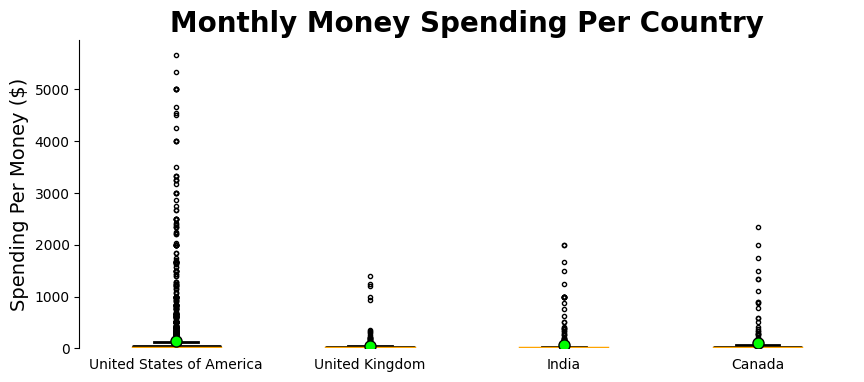

In [37]:
# Create new box plots (filter_fcc)
create_box_plot(df=filter_fcc)

## Choosing the Two Best Markets

Based on the findings, it is evident that the US is a promising market for advertising, as there is a significant number of new coders residing in the country who are willing to spend a substantial amount of money on learning each month. However, in order to expand our target market, we need to identify another potential market to advertise in.

Our company's subscription fee is \\$59 per month, and according to the data, Canada is the most profitable second market for us. People in Canada are willing to pay around \\$93 per month for learning to code, while in India and the United Kingdom, the amounts are \\$66 and \\$45 per month, respectively. However, before we make a final decision, let's take a closer look at India by considering the following points:

- The average monthly amount spent on learning to code in India is \\$66, which is not significantly lower than our subscription fee.
- India has a potential customer base that is almost twice as large as Canada.

The data strongly suggests that advertising in the UK is not a wise investment, so choosing between India and Canada is crucial for our marketing strategy.

In [38]:
# Frequency table for the 'CountryLive' column
round(filter_fcc['CountryLive'].value_counts(normalize=True)*100)

United States of America    75.0
India                       12.0
United Kingdom               7.0
Canada                       6.0
Name: CountryLive, dtype: float64

We are currently facing a decision-making challenge between Canada and India as our second best choice for advertising after the US. Although Canada seems like a more attractive option, India might offer a better opportunity due to its significant number of potential customers. We have several possible courses of action:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
    - 60% for the US, 25% for India, 15% for Canada.
    - 50% for the US, 30% for India, 20% for Canada; etc.


2. Advertise only in the US and India, or the US and Canada. It's wise to split the advertisement budget unequally:
    - 70% for the US, and 30% for India.
    - 65% for the US, and 35% for Canada; etc.


3. Advertise only in the US.

We should send our analysis to the marketing team and let them use their domain knowledge to decide. They may want to conduct extra surveys in India and Canada and then provide us with the new survey data for analysis.

## Conclusion

In this project, we aimed to determine the best markets to advertise our coding subscription service by analyzing survey data from new coders. After examining the data, we found that the US would be a good market to advertise in. This is due to the high number of new coders living in the US who are willing to pay a good amount of money each month for a subscription service. However, when it came to deciding on the second best market, it was not clear-cut whether we should choose India or Canada. While Canada seemed like a tempting choice due to the high amount of money new coders were willing to spend on average, India had almost twice as many potential customers.

As a result of this uncertainty, we decided to send the results to the marketing team. By doing so, we allowed them to use their domain knowledge to make the best decision based on our analysis. Additionally, they may choose to conduct extra surveys in India and Canada to gather more information, which would allow us to analyze the new data and make a more informed decision. Overall, we believe that our analysis has provided valuable insights and will help guide our marketing strategy moving forward.